# Firm Valuation

Valuing a private firm can be more challenging than valuing a public firm due to the lack of readily available financial data, but there are several established methods that can help you arrive at a reasonable estimate. Here are some common approaches
Finance Perspective::
## 1. Comparable Company Analysis (Market Multiples)
- **Process**: Identify similar publicly traded companies and apply their valuation multiples (e.g., Price/Earnings, Price/Sales, or EV/EBITDA) to the private company.
- **Steps**:
  1. Find public firms that operate in the same industry, have similar business models, and are of comparable size.
  2. Calculate the valuation multiples for these public firms (e.g., Enterprise Value/EBITDA, Price/Earnings ratio).
  3. Apply these multiples to the private firm’s financial metrics (e.g., earnings, sales).
  4. Adjust for differences in size, growth prospects, and risk between the private and public firms.
- **Challenges**: Adjustments for liquidity and size are often required, as private firms are typically riskier and less liquid than publfirms.

## 2. Discounted Cash Flow (DCF) Analysis
- **Process**: Estimate the future free cash flows of the company and discount them to present value using an appropriate discount rate (often the firm’s weighted average cost of capital, or WACC).
- **Steps**:
  1. Forecast the firm’s free cash flows (FCF) for a certain period (usually 5-10 years).
  2. Estimate the terminal value, which represents the value of the firm beyond the forecast period.
  3. Discount the projected cash flows and terminal value back to present value using the discount rate (WACC).
  4. Adjust for any debt or excess cash to arrive at an equity valuation.
- **Challenges**: Requires detailed financial projections and a reliable discount rate. The assumptions about growth rates and discount rates can significantly imp the valuation.

## 3. Precedent Transactions Analysis
- **Process**: Look at the prices paid for similar companies in recent transactions (mergers and acquisitions) and apply those multiples to the private firm.
- **Steps**:
  1. Identify recent transactions of similar firms in the same industry.
  2. Extract valuation multiples from these transactions (e.g., EV/EBITDA, EV/Sales).
  3. Apply these multiples to the private firm’s financials to estimate its value.
- **Challenges**: Finding truly comparable transactions and adjusting for timing differences, as market conditions may have changednce those transactions.

## 4. Asset-Based Valuation
- **Process**: Value the company based on the net value of its assets (assets minus liabilities).
- **Steps**:
  1. Sum up the fair market value of all the company’s tangible and intangible assets.
  2. Subtract any liabilities to determine the net asset value.
- **Challenges**: This method works well for asset-heavy firms but may undervalue firms with significant intangible assets (e.g., intectual property, brand value).

## 5. Earnings Capitalization Method
- **Process**: Use a company's historical earnings and capitalize them at a rate that reflects the risk of the business.
- **Steps**:
  1. Determine the firm’s normalized earnings (e.g., after adjusting for non-recurring events).
  2. Select an appropriate capitalization rate based on the firm's risk profile.
  3. Value the firm by dividing normalized earnings by the capitalization rate.
- **Challenges**: This method is more static andy not reflect future growth prospects.

## 6. Private Equity Valuation
- **Process**: Use private equity benchmarks, considering factors such as control premiums, illiquidity discounts, and expected returns that private equity investors would demand.
- **Steps**:
  1. Estimate future cash flows or earnings.
  2. Apply typical private equity valuation multiples or expected rates of return (IRR) from similar investments.
- **Challenges**: Access data on private equity deals can be limited.

## 7. Rule of Thumb Valuations
- **Process**: In some industries, companies are valued based on specific industry rules of thumb (e.g., X times revenue or X times EBITDA).
- **Steps**: Find common valuation benchmarks in the industry and apply them to your firm.
- **Challenges**: These are simplistic and do account for the nuances of individual businesses.

## Consider Adjustments for Private Firms:
- **Liquidity Discount**: Since private firms are harder to sell, a liquidity discount of 10-30% is often applied to the valuation.
- **Control Premium**: If you are valuing a controlling stake, add a control premium (10-40%) to reflect the added value of control.
- **Size Premium**: Smaller firms tend to carry higher n, a combination of methods gives the most comprehensive estimate.


| Company        | Start Year | End Year | Valuation Growth (%) | Key Factors                                                                                     |
|----------------|------------|----------|----------------------|--------------------------------------------------------------------------------------------------|
| Tesla          | 2019       | 2020     | 740%                 | Strong sales, stock splits, and investor optimism in electric vehicles and renewable energy       |
| Apple          | 2019       | 2020     | 85%                  | Record-breaking iPhone sales, growth in services, and investor confidence                         |
| Zoom           | 2019       | 2020     | 425%                 | Increased demand for video conferencing due to COVID-19 pandemic and remote work trends            |
| NVIDIA         | 2015       | 2016     | 224%                 | High demand for GPUs in gaming, artificial intelligence (AI), and cryptocurrency mining            |
| Moderna        | 2019       | 2020     | 434%                 | Successful progress in COVID-19 vaccine development and mRNA technology                           |
| Amazon         | 1998       | 1999     | 1,500%               | Expansion of e-commerce during the dot-com boom                                                   |
| Beyond Meat    | 2018       | 2019     | 200%                 | Rapid consumer adoption of plant-based diets and partnerships with fast-food chains and retailers  |
| Alibaba        | 2013       | 2014     | 37%                  | Successful IPO and growth in e-commerce and digital payments in China                             |


## Application

**Goal**: You are developing a valuation model for private firms using a combination of Graph Neural Networks (GNNs), Long Short-Term Memory networks (LSTMs), and Quantile Regression with LightGBM. The model aims to predict the valuations of private firms based on their features, historical data, and relationships with other firms in the same industry, while adhering to certain constraints derived from public firms' valuations.

**Approach**:

1. **Data Preparation**: Simulate firm data, including time series features and industry relationships.
2. **Model Components**: Build a neural network combining Graph Neural Networks (GNNs) and Long Short-Term Memory networks (LSTMs).
3. **Constraints Application**: Enforce valuation caps based on public firms during training and prediction.
4. **Quantile Regression with LightGBM**: Estimate valuation ranges using quantile regression.
5. **Adjustments and Final Output**: Apply liquidity discounts and control premiums, and present the results.

In [1]:
import numpy as np
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv
import lightgbm as lgb
import networkx as nx
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


### Data Preparation

Simulate a dataset that reflects real-world scenarios involving public and private firms, their industries, time series features, and inter-firm relationships.

In [2]:
# Parameters
NUM_FIRMS = 1000
NUM_PUBLIC = 100
NUM_INDUSTRIES = 5
YEARS = 5
FEATURES_PER_YEAR = 5
GROWTH_CAP_MULTIPLIER = 15  # 1500% growth

# Generate firm IDs and assign industries
firm_ids = np.arange(NUM_FIRMS)
industries = np.random.choice(range(NUM_INDUSTRIES), NUM_FIRMS)

# Assign public/private status
is_public = np.array([True]*NUM_PUBLIC + [False]*(NUM_FIRMS - NUM_PUBLIC))

# Generate time series data
np.random.seed(42)  # For reproducibility
time_series_data = np.random.randn(NUM_FIRMS, YEARS, FEATURES_PER_YEAR)

# Generate network connections within the same industry
G = nx.Graph()
G.add_nodes_from(firm_ids)
for industry in range(NUM_INDUSTRIES):
    firms_in_industry = firm_ids[industries == industry]
    if len(firms_in_industry) > 1:
        edges = list(nx.fast_gnp_random_graph(len(firms_in_industry), 0.1, seed=industry).edges())
        edges = [(firms_in_industry[u], firms_in_industry[v]) for u, v in edges]
        G.add_edges_from(edges)

# Create edge_index for PyTorch Geometric
edge_index = np.array(G.edges()).T
edge_index = torch.tensor(edge_index, dtype=torch.long)

# Assign valuations
public_valuations = np.random.uniform(100, 500, size=(NUM_PUBLIC, YEARS))
private_valuations = np.full((NUM_FIRMS - NUM_PUBLIC, YEARS), np.nan)
valuations = np.vstack([public_valuations, private_valuations])

# Combine features (excluding liquidity discounts and control premiums)
combined_features = torch.tensor(time_series_data, dtype=torch.float32)


 * Firm Generation: Creates a mix of public and private firms, each assigned to an industry.
 * Time Series Data: Simulates historical features (e.g., financial metrics) for each firm.
 * Network Connections: Models relationships between firms within the same industry using a random graph.
 * Valuations: Assigns known valuations to public firms and NaN to private firms.
 * Features Combination: Prepares the data for model input, excluding user-defined factors like liquidity discounts.

### Model Components

Define a neural network architecture that combines GNNs and LSTMs to process both relational (graph-based) and temporal (time series) data.

#### LSTM for Time Series Data

In [3]:
class LSTMTimeSeries(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2):
        super(LSTMTimeSeries, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        final_output = self.fc(lstm_out[:, -1, :])  # Last time step
        return final_output


#### GNN with Time Series

In [4]:
class GNNWithTimeSeries(nn.Module):
    def __init__(self, graph_input_dim, graph_hidden_dim, graph_output_dim,
                 time_input_dim, time_hidden_dim, time_output_dim):
        super(GNNWithTimeSeries, self).__init__()
        # GNN layers
        self.conv1 = GCNConv(graph_input_dim, graph_hidden_dim)
        self.conv2 = GCNConv(graph_hidden_dim, graph_output_dim)
        
        # LSTM layers
        self.lstm = LSTMTimeSeries(time_input_dim, time_hidden_dim, time_output_dim)
        
        # Final output layer
        self.fc_final = nn.Linear(graph_output_dim, 1)
        
    def forward(self, graph_features, time_features, edge_index):
        # GNN forward pass
        gnn_out = torch.relu(self.conv1(graph_features, edge_index))
        gnn_out = self.conv2(gnn_out, edge_index)
        
        # LSTM forward pass
        lstm_out = self.lstm(time_features)
        
        # Combine outputs
        combined = gnn_out + lstm_out  # Simple addition
        output = self.fc_final(combined)  # Scalar output
        return output.squeeze()


 * LSTM Network:
     * Captures temporal dependencies in the time series data for each firm.
     * Outputs a representation of the firm's historical performance.
 * GNN Network:
     * Processes graph-structured data, capturing the influence of connected firms.
     * Generates embeddings that reflect both a firm's features and its relationships.
 * Combination and Output:
     * The outputs from the LSTM and GNN are combined.
     * A final linear layer maps the combined representation to a scalar valuation prediction.

**Rationale**:
Integrated Modeling: Combining GNN and LSTM allows the model to consider both temporal trends and relational influences, providing a more comprehensive valuation estimate.


#### Compute Caps for Constraints

Calculate industry-specific valuation caps for each firm to enforce realistic valuation predictions based on public firms.

In [5]:
def compute_caps(firm_ids, industries, valuations, growth_cap_multiplier):
    caps = np.full(NUM_FIRMS, np.inf)  # Initialize with infinity
    for industry in range(NUM_INDUSTRIES):
        peer_vals = valuations[(industries == industry) & is_public, -1]
        if len(peer_vals) > 0:
            max_peer = np.max(peer_vals)
            cap = max_peer * growth_cap_multiplier
            caps[industries == industry] = cap
    return caps

# Compute caps and convert to tensor
caps = compute_caps(firm_ids, industries, valuations, GROWTH_CAP_MULTIPLIER)
caps_tensor = torch.tensor(caps, dtype=torch.float32)


Caps Calculation:
 * For each industry, identifies the maximum valuation among public firms.
 * Applies a growth multiplier (e.g., 1500%) to set the cap.
 * Assigns this cap to all firms within the same industry.


**Rationale**:
Industry-Based Constraints:
 * Ensures that private firms' valuations are within a reasonable range compared to their public peers.
 * Reflects market realities and prevents overestimation.

#### Training the GNN with Time Series (Modified)
Train the neural network while applying the calculated valuation caps to enforce constraints during learning.

In [6]:
loss_history = []

def train_gnn_with_time_series(model, optimizer, criterion, graph_features, time_features, edge_index, valuations, caps_tensor, epochs=100):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(graph_features, time_features, edge_index)
        
        # Apply constraints
        min_tensor = torch.zeros_like(output).to(caps_tensor.device)
        output = torch.clamp(output.to(caps_tensor.device), min=min_tensor, max=caps_tensor)
        
        # Compute loss on public firms
        target = valuations[:, -1]
        mask = ~np.isnan(target)
        target = torch.tensor(target[mask], dtype=torch.float32).to(caps_tensor.device)
        
        preds = output[mask]
        
        loss = criterion(preds, target)
        loss.backward()
        optimizer.step()
        
        loss_history.append(loss.item())
        
        if (epoch+1) % 20 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


In [7]:
# Model Initialization and Training Execution:

# Initialize the model
GRAPH_INPUT_DIM = combined_features.shape[2]  # Number of features per node
GRAPH_HIDDEN_DIM = 64
GRAPH_OUTPUT_DIM = 32

TIME_INPUT_DIM = FEATURES_PER_YEAR
TIME_HIDDEN_DIM = 64
TIME_OUTPUT_DIM = 32

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model
model = GNNWithTimeSeries(
    graph_input_dim=GRAPH_INPUT_DIM,
    graph_hidden_dim=GRAPH_HIDDEN_DIM,
    graph_output_dim=GRAPH_OUTPUT_DIM,
    time_input_dim=TIME_INPUT_DIM,
    time_hidden_dim=TIME_HIDDEN_DIM,
    time_output_dim=TIME_OUTPUT_DIM
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Prepare features and move to device
graph_features = combined_features[:, -1, :].to(device)
time_features = combined_features.to(device)
edge_index = edge_index.to(device)
caps_tensor = caps_tensor.to(device)

# Train the model
train_gnn_with_time_series(
    model,
    optimizer,
    criterion,
    graph_features,
    time_features,
    edge_index,
    valuations,
    caps_tensor,
    epochs=100
)


Epoch 1/100, Loss: 98064.9062


Epoch 20/100, Loss: 36558.7617


Epoch 40/100, Loss: 13651.0820


Epoch 60/100, Loss: 12079.2158


Epoch 80/100, Loss: 11743.6221


Epoch 100/100, Loss: 11517.5195


 * Applying Constraints:
     * Uses torch.clamp to enforce that predictions are between 0 and the cap.
     * Ensures that the model learns to produce valuations within acceptable bounds.
 * Loss Computation:
     * Calculates loss only on public firms since their true valuations are known.
     * Uses Mean Squared Error (MSE) as the loss function.
 * Training Loop:
     * Performs forward pass, backpropagation, and optimizer step.
     * Records loss for analysis.

**Rationale**

 * Constraint Enforcement During Training:
     * Helps the model to internalize the valuation limits.
     * Leads to more realistic predictions for private firms.
 * Focusing on Public Firms for Loss:
     * Since private firms' valuations are unknown, training on public firms prevents introducing noise from uncertain targets.

#### Model Validation

Evaluate the model's predictive performance using standard regression metrics and visualize the results.


Validation Metrics:
Mean Absolute Error (MAE): 89.8252
Root Mean Squared Error (RMSE): 107.2832
R-squared (R2): 0.1445


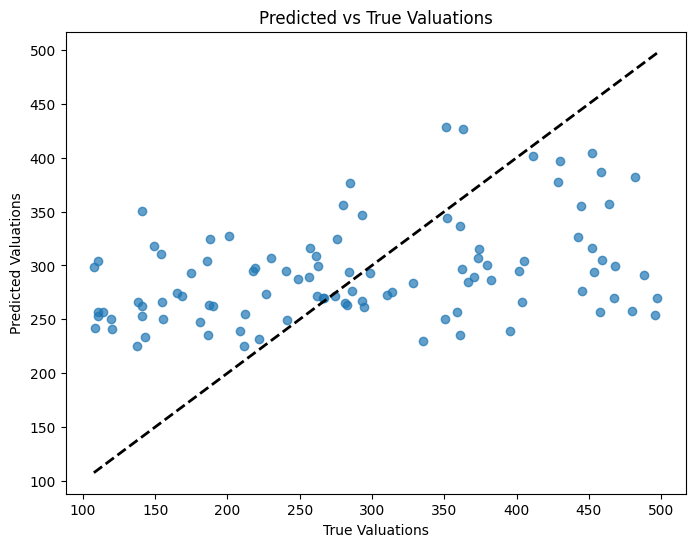

In [8]:
# Get model predictions and embeddings
model.eval()
with torch.no_grad():
    all_preds = model(graph_features, time_features, edge_index)
    
    # Ensure 'all_preds' and 'caps_tensor' are on the same device
    all_preds = all_preds.to(caps_tensor.device)
    
    # Create 'min_tensor' as zeros_like 'all_preds' on the same device
    min_tensor = torch.zeros_like(all_preds).to(caps_tensor.device)
    
    # Apply constraints to the output
    all_preds = torch.clamp(all_preds, min=min_tensor, max=caps_tensor)
    
    node_embeddings = all_preds.cpu().numpy()


def validate_model(preds, valuations):
    target = valuations[:, -1]
    mask = ~np.isnan(target)
    target = target[mask]
    preds = preds[mask]

    # Evaluation metrics
    mae = mean_absolute_error(target, preds)
    mse = mean_squared_error(target, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(target, preds)

    print(f"\nValidation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

    # Plotting Predictions vs True Values
    plt.figure(figsize=(8,6))
    plt.scatter(target, preds, alpha=0.7)
    plt.xlabel('True Valuations')
    plt.ylabel('Predicted Valuations')
    plt.title('Predicted vs True Valuations')
    plt.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=2)
    plt.show()

# Validate the model
validate_model(node_embeddings, valuations)


Metrics Computed:
 * MAE: Average absolute difference between predicted and true valuations.
 * RMSE: Square root of the average squared differences.
 * R² Score: Proportion of variance explained by the model.
 * Visualization:
 * Scatter plot of predicted vs. true valuations.
 * Diagonal line represents perfect predictions.

**Rationale**: Assessing Model Performance:
 * Metrics provide quantitative measures of accuracy.
 * Visualization helps identify patterns, biases, or outliers.

#### Plot Loss over Epochs

Monitor the training process to ensure the model is learning effectively.

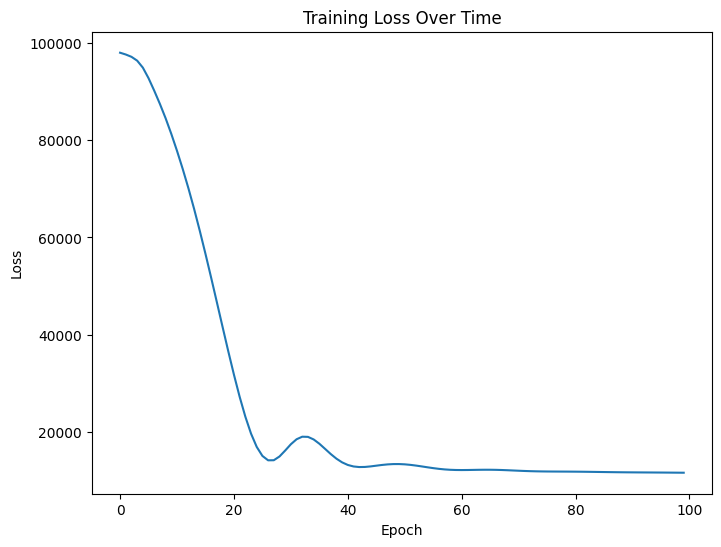

In [9]:
def plot_loss_history():
    plt.figure(figsize=(8,6))
    plt.plot(loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Time')
    plt.show()

# Plot the loss
plot_loss_history()


Loss Curve:
 * Displays how the loss decreases over epochs.
 * Helps identify issues like plateauing or increasing loss.

**Rationale**: Training Monitoring:
 * Ensures that the model is converging.
 * Provides insight into whether more epochs are needed or if overfitting is occurring.

#### LightGBM with Quantile Regression

Estimate the lower and upper bounds of the firm's valuation using quantile regression, providing a range rather than a single point estimate.

In [10]:
# Prepare features for LightGBM
X_combined = node_embeddings.reshape(-1, 1)  # Use model predictions as features
y = valuations[:, -1]

# Split into training data (public firms only)
train_mask = ~np.isnan(y)
X_train = X_combined[train_mask]
y_train = y[train_mask]

# Function to train LightGBM quantile model
def train_lightgbm_quantile(X_train, y_train, quantile=0.5):
    params = {
        'boosting_type': 'gbdt',
        'objective': 'quantile',
        'metric': 'quantile',
        'alpha': quantile,
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9,
        'verbose': -1,
    }
    lgb_train = lgb.Dataset(X_train, y_train)
    model = lgb.train(params, lgb_train, num_boost_round=100)
    return model

# Train quantile models
gbm_upper = train_lightgbm_quantile(X_train, y_train, quantile=0.9)
gbm_lower = train_lightgbm_quantile(X_train, y_train, quantile=0.1)

# Predict on all firms
y_pred_upper = gbm_upper.predict(X_combined)
y_pred_lower = gbm_lower.predict(X_combined)


 * Feature Preparation:
     * Uses the neural network's predictions as the sole feature for LightGBM.
     * Focuses on capturing the relationship between the predicted valuations and the true valuations.
 * Quantile Regression:
     * Trains two models targeting different quantiles (e.g., 10th and 90th percentiles).
     * The alpha parameter in LightGBM specifies the quantile to estimate.

**Rationale**:

 * Why Quantile Regression with LightGBM?
     * Uncertainty Estimation:
         * Provides a range for valuations, acknowledging the inherent uncertainty in predictions.
         * Helps in risk assessment by offering lower and upper bounds.
     * Non-parametric Approach:
         * LightGBM is a gradient boosting framework that can model complex nonlinear relationships without assuming a specific data distribution.
         * Suitable for capturing patterns that neural networks might have missed.
     * Complementary to Neural Networks:
         * While neural networks provide a point estimate, LightGBM quantile regression refines this estimate by learning from residual errors.
         * Leverages the strengths of both models for better prediction intervals.
 * Choice of LightGBM:
     * Efficiency: LightGBM is known for its speed and efficiency, especially with large datasets.
     * Flexibility: Supports quantile regression out of the box, making it convenient for estimating different quantiles.
     * Handling Overfitting: Features built-in mechanisms like early stopping and regularization to prevent overfitting.

#### Applying Constraints (Adjusted)

Ensure the LightGBM predictions adhere to the same valuation caps applied during neural network training.

In [11]:
# Apply constraints to LightGBM predictions
bounded_lower = np.maximum(y_pred_lower, 0)
bounded_upper = y_pred_upper.copy()

for i in range(NUM_FIRMS):
    cap = caps[i]
    bounded_upper[i] = min(bounded_upper[i], cap)


 * Lower Bound: Ensures that the lower bound predictions are not negative.
 * Upper Bound: Caps the upper bound predictions using the previously calculated industry-specific caps.

**Rationale**: Consistency in Constraints:
 * Maintains the integrity of the valuation estimates across different modeling stages.
 * Prevents unrealistic valuation ranges.

#### Liquidity Discount and Control Premium Adjustments

Adjust the bounded valuation ranges based on user-defined liquidity discounts and control premiums.

In [12]:
# Simulate liquidity discounts and control premiums
latest_liquidity = np.full(NUM_FIRMS, 0.2)  # 20% liquidity discount
latest_control = np.full(NUM_FIRMS, 0.3)    # 30% control premium

def adjust_valuations(bounded_lower, bounded_upper, liquidity_discounts, control_premiums):
    adjusted_lower = bounded_lower * (1 - liquidity_discounts) * (1 + control_premiums)
    adjusted_upper = bounded_upper * (1 - liquidity_discounts) * (1 + control_premiums)
    return adjusted_lower, adjusted_upper

# Adjust valuations
adjusted_lower, adjusted_upper = adjust_valuations(
    bounded_lower,
    bounded_upper,
    latest_liquidity,
    latest_control
)


 * Liquidity Discount:
     * Reflects the reduced marketability of private firm shares.
     * Decreases the valuation to account for the difficulty in selling shares.
 * Control Premium:
     * Represents the additional value of having controlling interest.
     * Increases the valuation for majority ownership stakes.
 * Adjustment Formula:
     * Adjusted Valuation = Valuation × (1 - Liquidity Discount) × (1 + Control Premium)

**Rationale**

 * Customization: Allows users to input values based on specific transaction conditions or market insights.
 * Realism: Incorporates factors that significantly impact firm valuations in practice.

#### Final Output

Consolidate all results and present them in an accessible format for analysis or reporting.

In [13]:
# Create a DataFrame to display results
results = pd.DataFrame({
    'Firm_ID': firm_ids,
    'Industry': industries,
    'Is_Public': is_public,
    'Predicted_Lower_Bound': y_pred_lower,
    'Predicted_Upper_Bound': y_pred_upper,
    'Bounded_Lower': bounded_lower,
    'Bounded_Upper': bounded_upper,
    'Adjusted_Lower': adjusted_lower,
    'Adjusted_Upper': adjusted_upper
})

# Display the first 10 results
print("\nFinal Valuation Results:")
print(results.head(10))



Final Valuation Results:
   Firm_ID  Industry  Is_Public  Predicted_Lower_Bound  Predicted_Upper_Bound  \
0        0         2       True             179.155729             452.646379   
1        1         2       True             167.643709             455.266269   
2        2         3       True             167.643709             455.266269   
3        3         2       True             152.870640             448.479663   
4        4         3       True             147.062618             458.987070   
5        5         3       True             179.474740             452.646379   
6        6         2       True             114.127490             399.494178   
7        7         0       True             179.474740             452.646379   
8        8         2       True             147.062618             458.987070   
9        9         4       True             114.127490             399.494178   

   Bounded_Lower  Bounded_Upper  Adjusted_Lower  Adjusted_Upper  
0     179.155729

### Possible Improvements
1. Advanced Model Architectures:
 * Experiment with different GNN variants (e.g., Graph Attention Networks).
 * Explore more sophisticated methods of combining GNN and LSTM outputs.
2. Hyperparameter Optimization:
 * Use automated tools (e.g., Grid Search, Bayesian Optimization) to fine-tune model parameters.
3. Regularization and Overfitting Prevention:
 * Implement dropout layers, weight decay, and early stopping techniques.
4. Cross-Validation:
 * Employ k-fold cross-validation to assess the model's generalization capability.
5. Uncertainty Quantification:
 * Utilize Bayesian neural networks or ensemble methods for better uncertainty estimation.
6. Model Interpretability:
 * Apply SHAP values or other explainability techniques to understand feature importance.
